## Bethany Ludwig

Due by 2 PM on Monday May 20th
----
 - Generate a random data set with some noise. Here are a couple examples:  
     X = np.random.rand(n_samples)  
     y = np.cos(X) + 0.1 * np.random.randn(n_samples)  
     X = 15 * np.random.rand(n_samples)  
     y = np.sin(X) + 3. * (0.5 - np.random.rand(n_samples))  
 - Plot the data, the true function that the data came from, and an Ordinary Least Squares fit.
 - Calculate the mean squared error of that fit.

In [41]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.optimize as optimization 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
plt.style.use("seaborn-bright")

The Mean Square Error Is: 0.046474523228630334


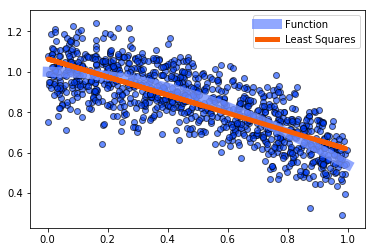

In [147]:
n_samples = 1000
X = np.random.rand(n_samples); y = np.cos(X) + 0.1 * np.random.randn(n_samples)
X = X.reshape(n_samples,1)

xx = np.arange(0,1.1,0.1)
yy = np.cos(xx) 

X_train = X[:-int(n_samples/2)]
X_test = X[-int(n_samples/2):]

Y_train = y[:-int(n_samples/2)]
Y_test = y[-int(n_samples/2):]

reg_LR = LinearRegression().fit(X_train,Y_train)
y_predict_LR = reg_LR.predict(X_test)

mse = mean_squared_error(Y_test,Y_predict)
print("The Mean Square Error Is: " + str(mse))

plt.figure()
plt.scatter(X,y,alpha=0.6,edgecolor='black')
plt.plot(xx,yy,linewidth=10,c="#7692FF",label="Function",alpha=0.8)
plt.plot(X_test,y_predict_LR,linestyle="-",c="#F75C03",label="Least Squares",linewidth=5)
plt.legend()

 - Use RidgeCV to determine the appropriate alpha value, then fit the data with Ridge Regression.

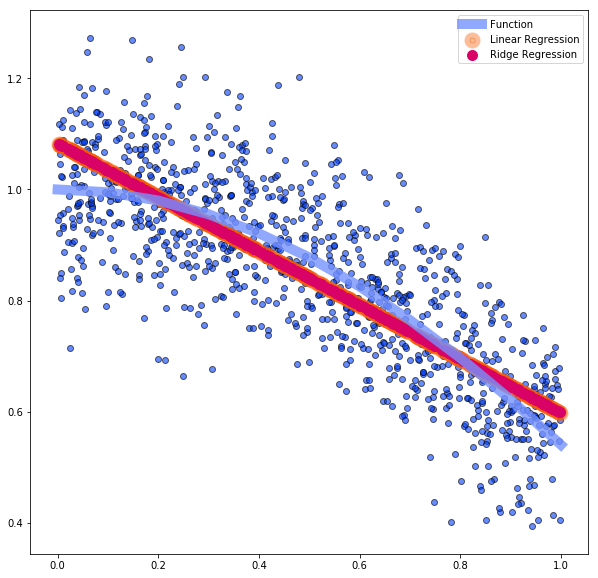

In [106]:
regression_RCV = RidgeCV(alphas=np.logspace(-6,6,100)).fit(X_train,Y_train)
alpha = regression_RCV.alpha_

clf = Ridge(alpha=alpha)
clf.fit(X_train,Y_train)
y_predict_R = clf.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(X,y,alpha=0.6,edgecolor='black')
plt.plot(xx,yy,linewidth=10,c="#7692FF",label="Function",alpha=0.8)
plt.scatter(X_test,y_predict_LR,linestyle="-",c="#F75C03",label="Linear Regression",linewidth=10,alpha=0.4)
plt.scatter(X_test,y_predict_R,linestyle="-",c="#D90368",label="Ridge Regression",linewidth=5)
plt.legend()

 - Use PolynomialFeatures to generate a new feature matrix from X. Try a few different numbers of degrees.
 - Use Least Squares to fit these matrices (you'll want to use make_pipeline), plot the fit, and calculate the mean squared errors.

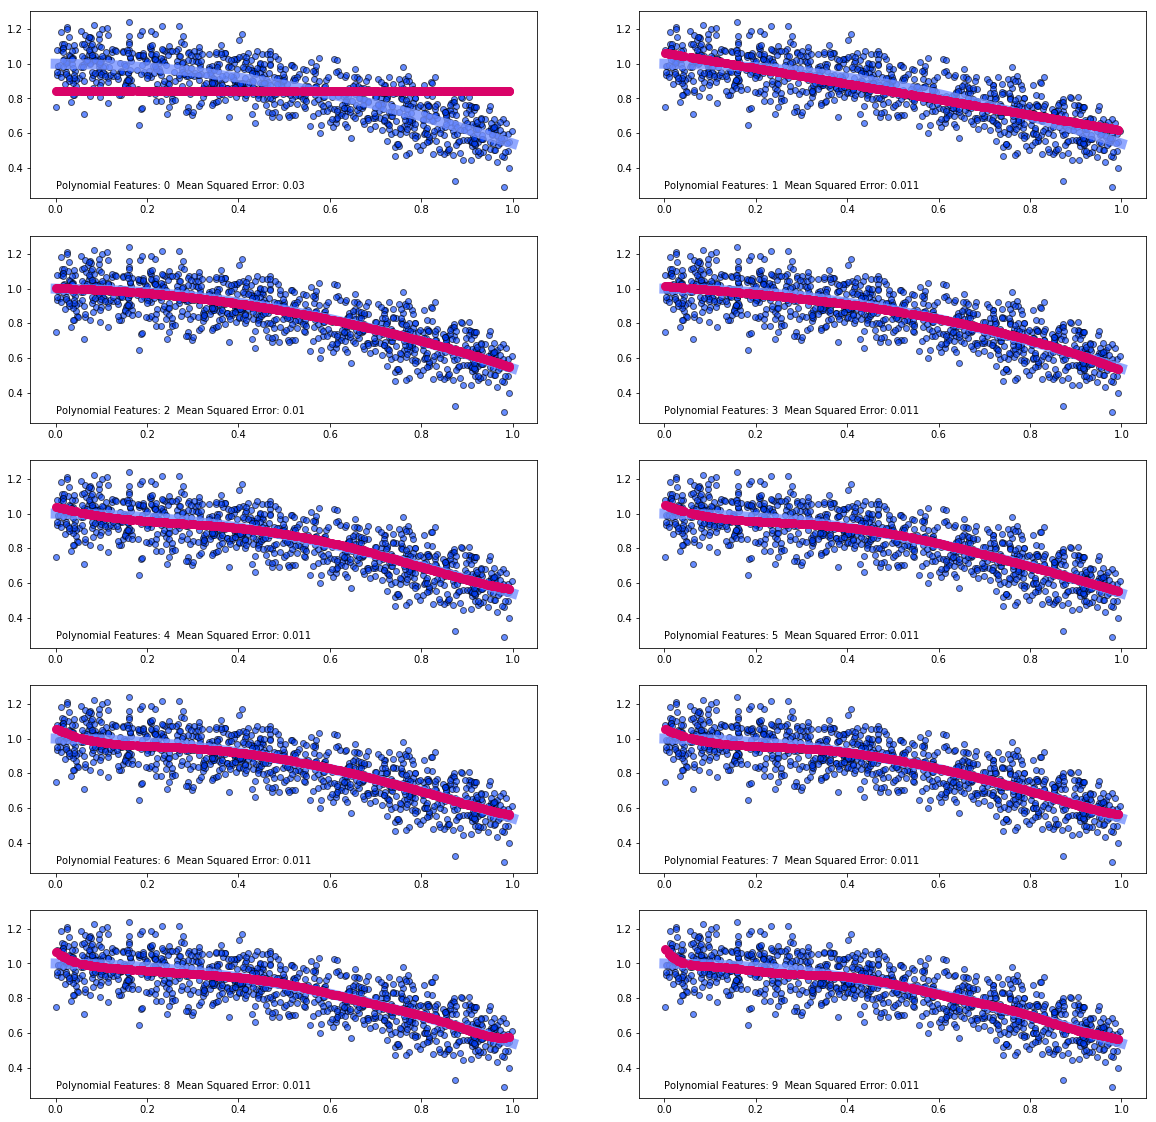

In [149]:
y_predict_P = [make_pipeline(PolynomialFeatures(i),LinearRegression()).fit(X_train,Y_train).predict(X_test) for i in range(0,10)]
mses = [mean_squared_error(Y_test,y_predict_P[i]) for i in range(0,10)]

fig = plt.figure(figsize=(20,20))

for i in range(1,11):
    ax = fig.add_subplot(5,2,i)
    
    ax.scatter(X,y,alpha=0.6,edgecolor='black')
    ax.plot(xx,yy,linewidth=10,c="#7692FF",label="Function",alpha=0.8)
    ax.scatter(X_test,y_predict_P[i-1],linestyle="-",c="#D90368",label="Ridge Regression",linewidth=3,zorder=3)
    ax.text(0.05,0.05,(("Polynomial Features: {}  Mean Squared Error: {:.2}").format(i-1,mses[i-1])),transform=ax.transAxes)

 - Use Ridge Regression to fit these matrices (again with make_pipeline), plot the fit, and calculate the mean squared errors.

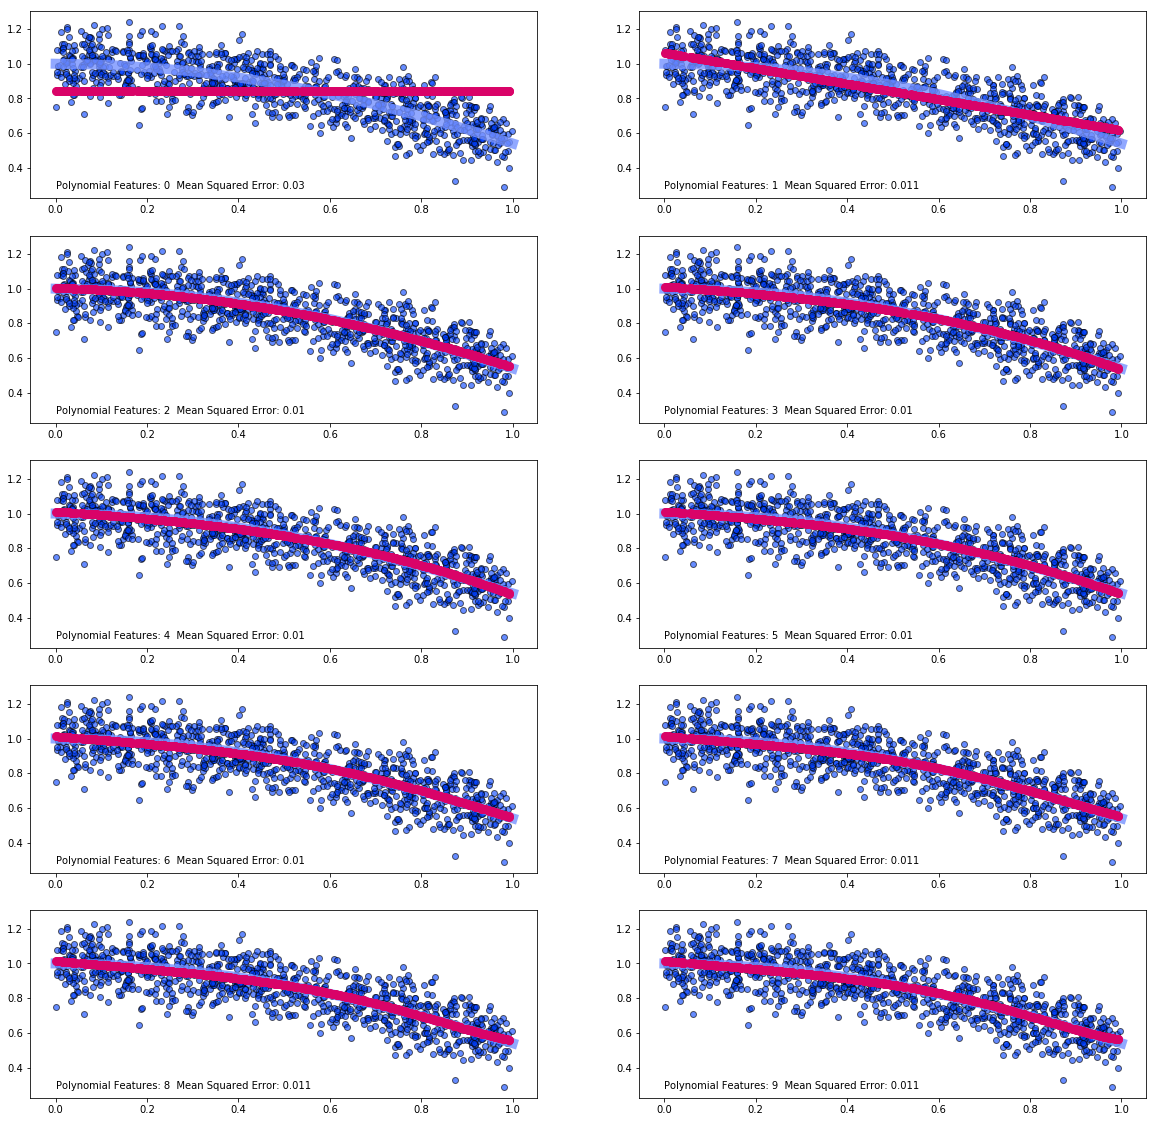

In [150]:
y_predict_P = [make_pipeline(PolynomialFeatures(i),Ridge(alpha=alpha)).fit(X_train,Y_train).predict(X_test) for i in range(0,10)]
mses = [mean_squared_error(Y_test,y_predict_P[i]) for i in range(0,10)]

fig = plt.figure(figsize=(20,20))

for i in range(1,11):
    ax = fig.add_subplot(5,2,i)
    
    ax.scatter(X,y,alpha=0.6,edgecolor='black')
    ax.plot(xx,yy,linewidth=10,c="#7692FF",label="Function",alpha=0.8)
    ax.scatter(X_test,y_predict_P[i-1],linestyle="-",c="#D90368",label="Ridge Regression",linewidth=3,zorder=3)
    ax.text(0.05,0.05,(("Polynomial Features: {}  Mean Squared Error: {:.2}").format(i-1,mses[i-1])),transform=ax.transAxes)

 - Compare the various fits and discuss any overfitting or underfitting you see.
 
With both Linear and Ridge Regression, adding in additional polynomic features has quickly diminishing returns after 3 or 2 features respectively, where the mean squared error ceases to change. The main difference between the methods, is that Linear Regression more obviously overfits the data. That is, it's a bit more squiggly. At excessive polynomic features, Ridge will turn up at the end but doesn't have the same oscillation.  